# INF8775 TP2

In [117]:
import torch
import math

# if torch.cuda.is_available():
#     import cupy as np
# else:
#     import numpy as np
import numpy as np
import matplotlib.pyplot as plt


[[   0  932]
 [1207  647]
 [ 127 1610]
 [ 777   89]
 [ 948 1670]]


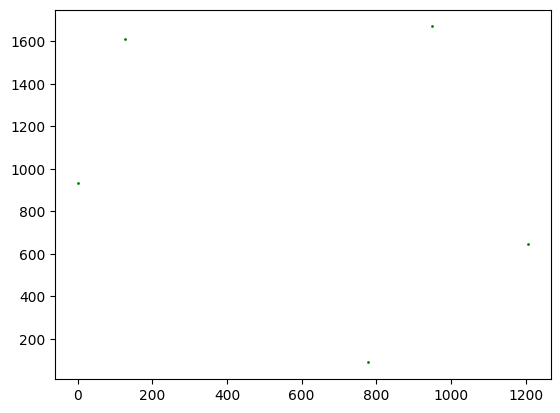

In [128]:
def load_file(file: str):
    with open(file) as f:
        data = f.read().replace('\t', ' ').splitlines()
        N = int(data[0])
        oneLineMatrix = " ".join(data[1:]).split(' ')
        matrix = np.array(list(map(int, oneLineMatrix))).reshape(N, 2)
    return N, matrix


file = "data/DP_N5_0"
n, m = load_file(file)
# print(n)
print(m)
plt.scatter(m[:, 0], m[:, 1], color="green", s=1)
plt.show()


In [151]:

def euclidianDist(a, b):
    sq = (a[0] - b[0])**2 + (a[1] - b[1])**2
    return math.floor(np.sqrt(sq))


print(m[0], m[3])
euclidianDist(m[0], m[3])


[  0 932] [777  89]


1146

## Greedy

In [130]:
import copy


def greeddyTSP(T: np.array):
    result = [0]
    cityList = copy.deepcopy(T)
    dist = 0
    # print(cityList)
    idx = 0
    i = 0
    while True:
        city = cityList[idx]
        cityList = np.delete(cityList, idx, axis=0)
        if (cityList.size == 0):
            return result, dist
        distances = np.array([euclidianDist(c, city) for c in cityList])
        dist += min(distances)
        # print(distances)
        idx = np.argmin(distances)
        # print(x)
        y = np.argmin(np.array([euclidianDist(c, cityList[idx]) for c in T]))

        # print(y)
        result.append(y)
        # print(f"{i = :2d} | Distances : {distances}")
        # print(f"   argmin in {idx = :2d}, city in {cityList[idx]}, global index {y = :2d}")
        # print(f"{abs(T - cityList[idx]) = }")
        i += 1


indexes, dist = greeddyTSP(m)
print(f"Distance : {dist}")


Distance : 3272.718817938409


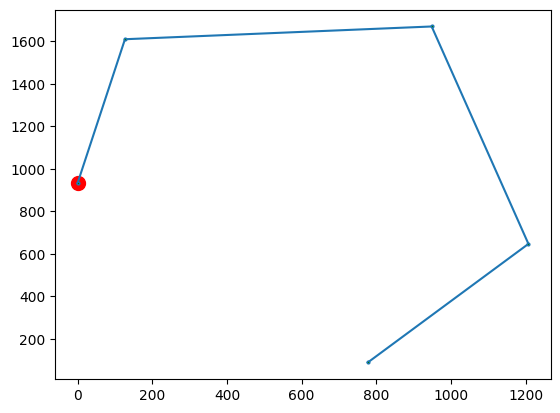

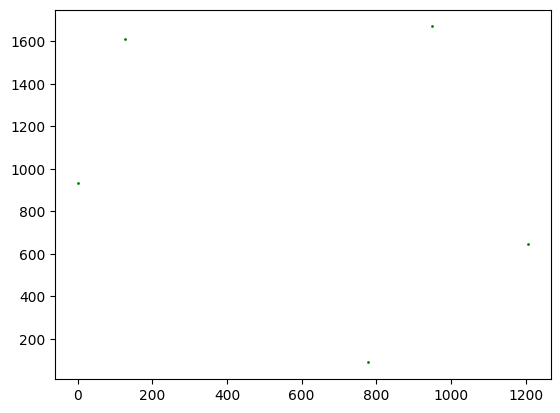

In [131]:
X, Y = [], []
for x in indexes:
    X.append(m[x, 0])
    Y.append(m[x, 1])

plt.plot(X, Y, marker="o", markersize=2, markerfacecolor="green")
plt.scatter(X[0], Y[0], color="red", s=100, marker="o")
plt.show()
plt.scatter(X, Y, color="green", s=1)
plt.show()


## Dynamic programming

In [158]:
S = set(range(1, n))
K = S - {1}
print(K, S)

{2, 3, 4} {1, 2, 3, 4}


In [165]:
cityList = m
def dynProg(d, i, S: set):
    if S == {}:
        return d[(i, tuple())]
    if i in S:
        return math.inf
    distances = []
    for j in S:
        dij = euclidianDist(cityList[i], cityList[j])
        S_ = S - {j}
        if (i, tuple(S_)) in d :
            tmp = d[(i, tuple(S_))]
        else :
            d[(i, tuple(S_))] = dynProg(d, j, S_)
        distances.append( dij + d[(i, tuple(S_))] )
    return min(distances)


S = set(range(1, n))
d = {}
for i in S:
    d[(i, tuple())] = euclidianDist(cityList[0], cityList[i])

print(S)
print(d)
d[0, tuple(S)] = dynProg(d, 0, S)
for k, v in d.items():
    print(f"{k} : {v}")

{1, 2, 3, 4}
{(1, ()): 1240, (2, ()): 689, (3, ()): 1146, (4, ()): 1201}
(1, ()) : 1240
(2, ()) : 689
(3, ()) : 1146
(4, ()) : 1201
(2, (4,)) : 2736
(2, (3,)) : 2791
(1, (3, 4)) : 3614
(3, (4,)) : 1512
(3, (2,)) : 2024
(1, (2, 4)) : 3166
(4, (3,)) : 2343
(4, (2,)) : 2800
(1, (2, 3)) : 3166
(0, (2, 3, 4)) : 3870
(1, (4,)) : 2736
(1, (3,)) : 2791
(2, (3, 4)) : 3440
(3, (1,)) : 2256
(2, (1, 4)) : 2216
(4, (1,)) : 1850
(2, (1, 3)) : 3398
(0, (1, 3, 4)) : 3870
(1, (2,)) : 2024
(3, (2, 4)) : 3079
(2, (1,)) : 2256
(3, (1, 4)) : 3079
(3, (1, 2)) : 2673
(0, (1, 2, 4)) : 3783
(4, (2, 3)) : 2728
(4, (1, 3)) : 3910
(4, (1, 2)) : 2728
(0, (1, 2, 3)) : 3783
(0, (1, 2, 3, 4)) : 4559
